In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from model import BuildingSimulation as bs, BuildingGraph as bg

plt.close('all')

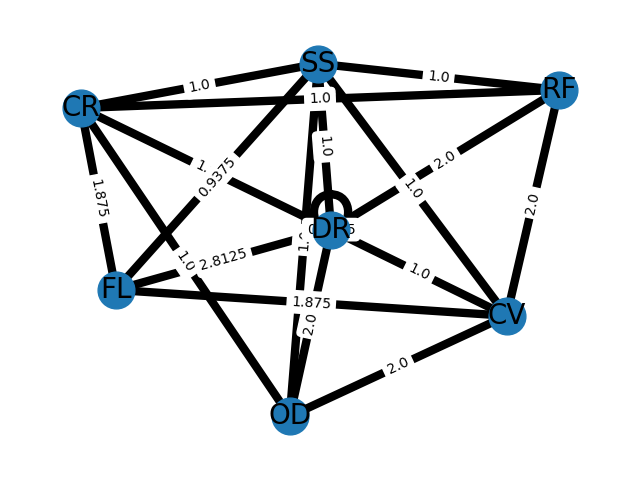

In [20]:
wW = 1- .25**2 #window-wall area
dW = 1 - .25*.75 #door-wall area
roomList = [
    ("CR", {}), 
    ("SS", {}), 
    ("DR", {}), 
    ("CV", {}), 
    ("FL", {}),
    ("RF", {}),
    ("OD", {}),
    ]

connectivityMatrix = np.array([
    [0, 1, 1, 0, 2*wW, 1, 1],
    [1, 0, 1 ,1, wW, 1, 1],
    [1, 1, dW, 1, 3*wW, 2, 2],
    [0, 1, 1, 0, 2*wW, 2, 2],
])

bG = bg.BuildingGraph(connectivityMatrix, roomList)
bG.draw()

In [21]:
sim_kwargs = {
    "delt": times[1] - times[0],
    "simLength": times[-1] - times[0],
    "Tout" : T_start - 10,
    "radG": None,
    "Tfloor": T_start,
}
wall_kwargs = {"X": 4, "Y": 3}
wall_kwargs_RF = {"X": 4, "Y": 4}

room_kwargs = {
    "T0": T_start,
    "V" : 4**2 * 3, #volume of air
    "Eint" : 0 #internal heat generation
}
vent_kwargs = {
    'H': 1,
    'W' : 1,
    "ventType": "None",
    "alphas": alphas,
    "As": As,
    "Ls": Ls,
}
rad_kwargs_RF = {
    "bG": bg.BuildingGraph(
        np.array([
            [0, -1, -1, -1, -1],
            [-1, 0, 0, 0, 0],
            [-1, 0, 0, 0, 0],
            [-1, 0, 0, 0, 0],
            [-1, 0, 0, 0, 0],
        ]),
        [
            ("sun", {}), 
            ("SS", {}),
            ("DR", {}),
            ("CV", {}),
            ("CR", {}),
        ]
    ),
}

rad_kwargs_FL = {
    "bG": bg.BuildingGraph(
        np.array([
            [0, 3],
            [3, 0],
        ]),
        [
            ("RF", {}), 
            ("FL", {}),
        ]
    ),
}


bG.updateEdges({"wall_kwargs" :wall_kwargs})
bG.updateNodes({"wall_kwargs" :wall_kwargs_RF}, nodes=["RF", "FL"])
bG.updateNodes({
    "room_kwargs": room_kwargs,
    "vent_kwargs": vent_kwargs,
    "rad_kwargs": {"bG": bg.BuildingGraph()},
    })
bG.updateNodes({"rad_kwargs": rad_kwargs_RF}, nodes=["RF"])
bG.updateNodes({"rad_kwargs": rad_kwargs_FL}, nodes=["SS", "DR", "CV", "CR"])

for r in ["CR", "DR"]:
    bG.G.nodes[r]["room_kwargs"]["V"] *= 2

build_sim = bs.BuildingSimulation(**sim_kwargs)
build_sim.initialize(bG)
# build_sim.run()
# plt.figure()
# for n, d in build_sim.bG.G.nodes(data=True):
#     plt.plot(build_sim.hours, d['Tints'], label=n)
# plt.legend()

# plt.figure()
# for i, j, d in build_sim.bG.G.edges(data=True):
#     plt.plot(build_sim.hours, d['T_profs'][0, :], label=f'{i}-{j}')
# plt.legend()

# plt.figure()
# for i, j, d in build_sim.bG.G.edges(data=True):
#     plt.plot(build_sim.hours, d['T_profs'][-1, :], label=f'{i}-{j}')
# plt.legend()

# plt.figure()
# for i, j, d in build_sim.bG.G.edges(data=True):
#     center = int(len(d['T_profs'][:, 0]) / 2)
#     plt.plot(build_sim.hours, d['T_profs'][center, :], label=f'{i}-{j}')
# plt.legend()

In [22]:
n = connectivityMatrix.shape[0]
interiorRooms = roomList[:n]
interiorRooms = [r[0] for r in interiorRooms]
radKwargs = {
    "solveRooms": interiorRooms,
}
# display(interiorRooms)

foo = bs.Radiation(**radKwargs)
foo.initialize("RF", build_sim.bG.G)
# foo.initialize("DR", build_sim.bG.G)

foo.bG.draw()
for n in foo.bG.G.nodes:
    print(n)

foo.A


AttributeError: module 'model.BuildingSimulation' has no attribute 'Radiation'

In [ ]:
foo.timeStep(solarGain=500)

296.3419973544974
296.3419973544974
296.3419973544974
296.3419973544974


sun           NaN
SS     702.506183
DR     702.506183
CV     702.506183
CR     702.506183
dtype: float64

In [ ]:
foo.b

AttributeError: 'Radiation' object has no attribute 'b'

In [ ]:
view = foo.bG.G['SS']
view
foo.bG.updateEdges({"weight": 69})
view
type(foo.bG.G)

networkx.classes.graph.Graph